In [28]:
import pandas as pd
import numpy as np
from sklearn import metrics


In [29]:
data = pd.read_csv('housing.csv')
data

,MedianIncome,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41,6.984127,1.023810,322,2.555556,37.88,-122.23,4.526
1,8.3014,21,6.238137,0.971880,2401,2.109842,37.86,-122.22,3.585
2,7.2574,52,8.288136,1.073446,496,2.802260,37.85,-122.24,3.521
3,5.6431,52,5.817352,1.073059,558,2.547945,37.85,-122.25,3.413
4,3.8462,52,6.281853,1.081081,565,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25,5.045455,1.133333,845,2.560606,39.48,-121.09,0.781
20636,2.5568,18,6.114035,1.315789,356,3.122807,39.49,-121.21,0.771
20637,1.7000,17,5.205543,1.120092,1007,2.325635,39.43,-121.22,0.923
20638,1.8672,18,5.329513,1.171920,741,2.123209,39.43,-121.32,0.847


In [30]:
cur_data = data.loc[:, ["MedianIncome", "Latitude", "Longitude"]]
cur_data

,MedianIncome,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [31]:
class Kmeans:
    def __init__(self, K=2, iter=10):
        self.K = K
        self.iter = iter

    def fit(self, data):
        idx = np.random.choice(len(data), self.K, replace=False)
        centroids = data.iloc[idx]
        from scipy.spatial.distance import cdist 

        distances = cdist(data, centroids ,'euclidean')        
        points = np.array([np.argmin(i) for i in distances])

        for _ in range(self.iter):
            centroids = []

            for idx in range(self.K):
                temp_cent = data[points==idx].mean(axis=0) 
                centroids.append(temp_cent)

            centroids = pd.DataFrame(centroids) 
            distances = cdist(data, centroids ,'euclidean')
            points = np.array([np.argmin(i) for i in distances])

        return points


In [32]:
for i in range(2, 7):
    kmean = Kmeans(K=i)
    ans = kmean.fit(cur_data)
    silhou = metrics.silhouette_score(cur_data, ans)
    davies = metrics.davies_bouldin_score(cur_data, ans)
    print(f"number of clusters = {i}, silhouette score = {silhou}, davies_bouldin_score = {davies}")

number of clusters = 2, silhouette score = 0.5665094919763822, davies_bouldin_score = 0.6687381912693037
number of clusters = 3, silhouette score = 0.5034083058473193, davies_bouldin_score = 0.7637776310853658
number of clusters = 4, silhouette score = 0.42353170925111916, davies_bouldin_score = 0.8737600179664193
number of clusters = 5, silhouette score = 0.36737886235340783, davies_bouldin_score = 0.954470367481734
number of clusters = 6, silhouette score = 0.3776241315514394, davies_bouldin_score = 0.8673574303332287


In [33]:
print("we will take number of clusters as 2 as it have highest silhouette score and lowest davies bouldin score ")
kmean = Kmeans(K=2)
clusters = kmean.fit(cur_data)
clusters

we will take number of clusters as 2 as it have highest silhouette score and lowest davies bouldin score 


array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
new_data = pd.DataFrame()
new_data["MedianHouseValue"] = data["MedianHouseValue"]
new_data["clusters"] = clusters

<AxesSubplot:title={'center':'MedianHouseValue'}, xlabel='clusters'>

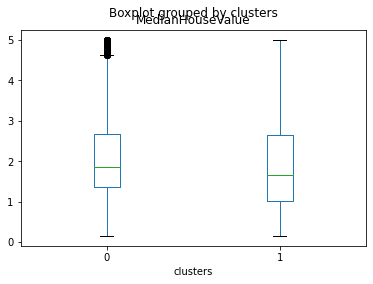

In [35]:
new_data.boxplot(column = "MedianHouseValue",by="clusters", grid=False)